In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data_path="C:/Users/alexa/Desktop/Statistical-Analysis-Visualizations-Projects/Bank Customer Churn Dataset.csv"
df=pd.read_csv(data_path)

### The proportion of the customers that are still using the banking services compared to those that have left in the period 

In [3]:
customer_stayed = df[df['Exited'] == 0].shape[0]
customer_exited = df[df['Exited'] == 1].shape[0]

# Calculate proportions
proportion_stayed =round(customer_stayed / (customer_stayed + customer_exited ) *100)
proportion_exited =round(customer_exited / (customer_stayed + customer_exited) *100)

print(f'Total Styed customer {proportion_stayed} %  VS  Total Exited customer {proportion_exited} %')



Total Styed customer 80 %  VS  Total Exited customer 20 %


In [4]:
total_customers = df.shape[0]
retained_customers = round(total_customers * (proportion_stayed / 100))
exited_customers =round (total_customers * (proportion_exited/ 100))

retained_customers, exited_customers ,total_customers

(7984, 1996, 9980)

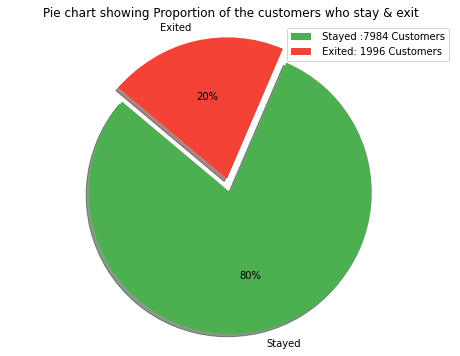

In [5]:
labels=['Stayed', 'Exited']
sizes = [customer_stayed, customer_exited]
colors = ['#4CAF50', '#F44336']
explode = (0.1, 0)

# Plotting the pie chart with labels
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Pie chart showing Proportion of the customers who stay & exit')
plt.legend([f' Stayed :{int(retained_customers)} Customers' ,f' Exited: {int(exited_customers)} Customers'])
plt.show()

### The relationship between the number of complaints received by the bank authorities and the number of exited customers.

In [6]:
#the correlation between 'Complain' and 'Exited' columns
correlation =df[['Complain','Exited']].corr()
correlation


,Complain,Exited
Complain,1.000000,0.995679
Exited,0.995679,1.000000


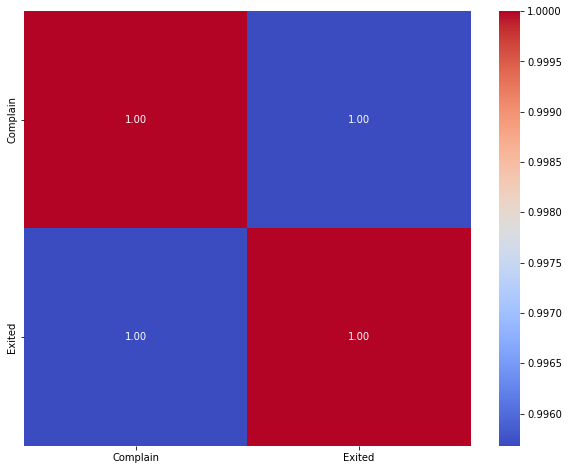

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

 ### The characteristics and statistics (in terms of gender, age groups, and tenure etc,) of the customers that are more likely to complain

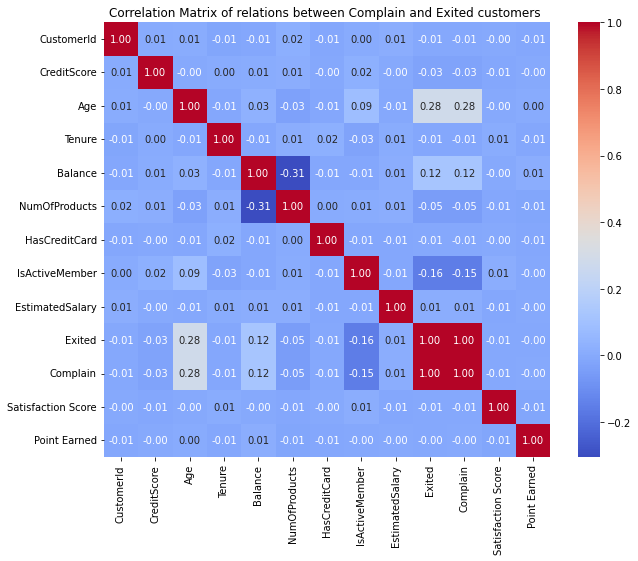

In [8]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of relations between Complain and Exited customers ')
plt.show()

##  An informative profile description of those type of customers.

In [9]:
# Gender distribution of complainers
gender_distribution_complainers = df[df['Complain'] == 1]['Gender'].value_counts()


In [10]:
print(gender_distribution_complainers)

Female    1138
Male       899
Name: Gender, dtype: int64


In [11]:
gender_distribution_complainers = (df[df['Complain'] == 1]['Gender'].value_counts(normalize=True) * 100 ).round(2)
gender_distribution_complainers

Female    55.87
Male      44.13
Name: Gender, dtype: float64

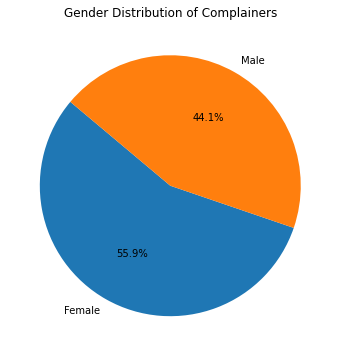

In [12]:
#  Gender Distribution
plt.figure(figsize=(8, 6))
plt.pie(gender_distribution_complainers, labels=gender_distribution_complainers.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Complainers')
plt.show()


In [13]:
#Card Type Distribution among Complainers
card_type_complainers = df[df['Complain'] == 1]['Card Type'].value_counts(normalize=False) * 100
card_type_complainers

DIAMOND     54500
PLATINUM    51000
SILVER      50000
GOLD        48200
Name: Card Type, dtype: int64

In [14]:
card_type_complainers = (df[df['Complain'] == 1]['Card Type'].value_counts(normalize=True) * 100).round(2)
card_type_complainers

DIAMOND     26.76
PLATINUM    25.04
SILVER      24.55
GOLD        23.66
Name: Card Type, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

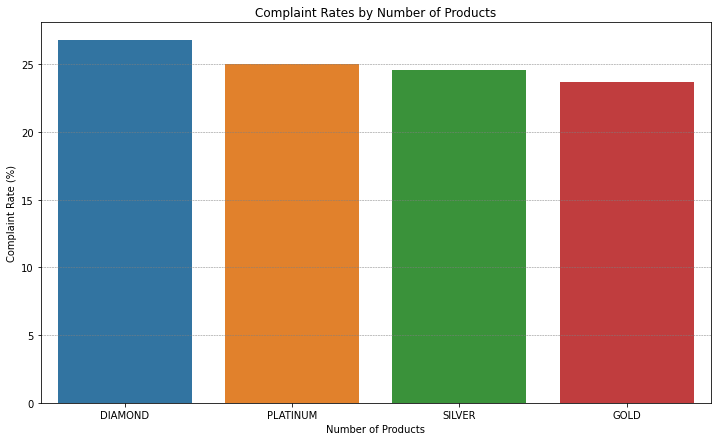

In [15]:
complainers = df[df['Complain'] == 1]

# NumOfProducts vs. Complaints
plt.figure(figsize=(12, 7))
sns.barplot(x=card_type_complainers.index, y=card_type_complainers.values)
plt.title('Complaint Rates by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Complaint Rate (%)')
plt.grid(axis='y',color='gray', linestyle='--', linewidth=0.5)
plt.show

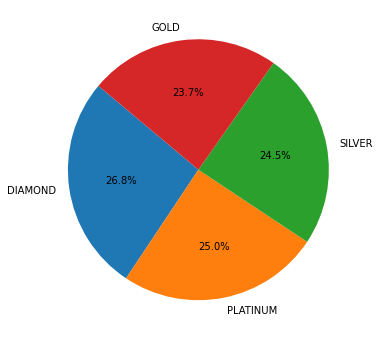

In [16]:
plt.figure(figsize=(8, 6))
plt.pie(card_type_complainers, labels=card_type_complainers.index, autopct='%1.1f%%', startangle=140)
plt.show()


In [17]:
# Membership Status Distribution Complainers
membership_complainers= df[df['Complain'] == 1]['IsActiveMember'].value_counts(normalize=False) * 100
membership_complainers

0    129900
1     73800
Name: IsActiveMember, dtype: int64

In [18]:
membership_complainers = (df[df['Complain'] == 1]['IsActiveMember'].value_counts(normalize=True) * 100).round(2)
membership_complainers

0    63.77
1    36.23
Name: IsActiveMember, dtype: float64

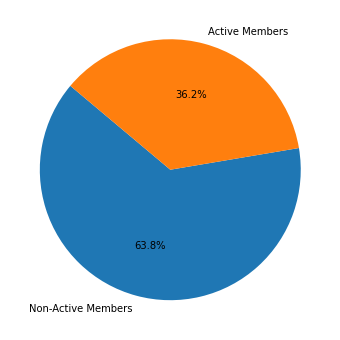

In [19]:
plt.figure(figsize=(8, 6))
labels = ['Non-Active Members', 'Active Members']
plt.pie(membership_complainers, labels=labels, autopct='%1.1f%%', startangle=140)
plt.show()


In [20]:
complaints_by_country = (df[df['Complain'] == 1]['Location'].value_counts(normalize=True) * 100).round(2)

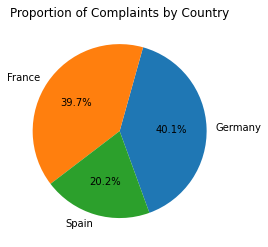

In [21]:
# Proportion of Complaints by Country
country_labels = complaints_by_country.index
country_sizes = complaints_by_country.values
plt.pie(country_sizes, labels=country_labels, autopct='%1.1f%%', startangle=290)
plt.title('Proportion of Complaints by Country')
plt.show()

In [22]:
complainers = df[df['Complain'] == 1]
num_products_complaints = df.groupby('NumOfProducts')['Complain'].mean()
num_products_complaints

NumOfProducts
1    0.276738
2    0.077309
3    0.826415
4    1.000000
Name: Complain, dtype: float64

In [23]:
card_type_complaints = complainers['Card Type'].value_counts(normalize=True) * 100
card_type_complaints 


DIAMOND     26.755032
PLATINUM    25.036819
SILVER      24.545901
GOLD        23.662248
Name: Card Type, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

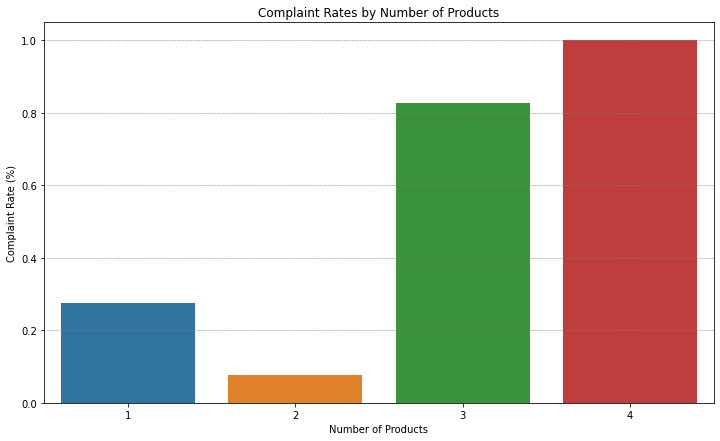

In [24]:
complainers = df[df['Complain'] == 1]
# NumOfProducts vs Complaints
plt.figure(figsize=(12, 7))
sns.barplot(x=num_products_complaints.index, y=num_products_complaints.values)
plt.title('Complaint Rates by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Complaint Rate (%)')
plt.grid(axis='y',color='gray', linestyle='--', linewidth=0.5)
plt.show

In [25]:
# Calculating mean and standard deviation for EstimatedSalary and Balance for Complainers
salary_stats_complainers = df[df['Complain'] == 1]['EstimatedSalary'].agg(['mean', 'std']).round(2)
balance_stats_complainers = df[df['Complain'] == 1]['Balance'].agg(['mean', 'std']).round(2)

# Creating the DataFrame
financial_stats_df = pd.DataFrame(salary_stats_complainers)
financial_stats_df1=pd.DataFrame(balance_stats_complainers)


In [26]:
financial_stats_df


,EstimatedSalary
mean,101449.58
std,57852.89


In [27]:
financial_stats_df1

,Balance
mean,91203.84
std,58347.19


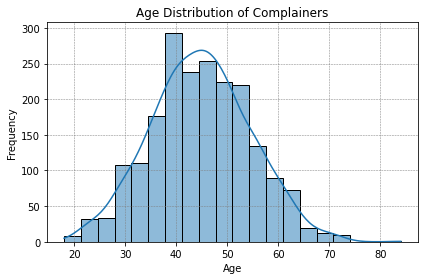

In [28]:
#Age Distribution of Complainers
complainers = df[df['Complain'] == 1]
sns.histplot(complainers['Age'], bins=20, kde=True)
plt.title('Age Distribution of Complainers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

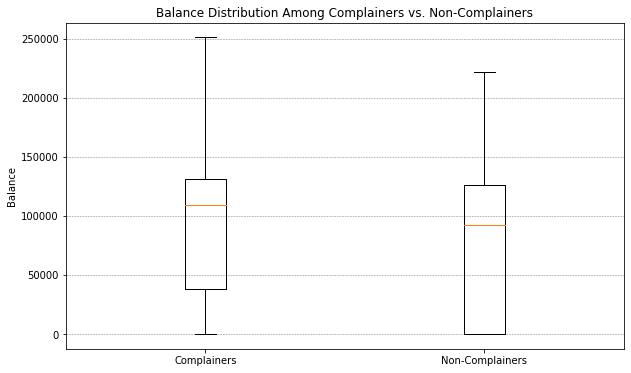

In [29]:
#Balance Distribution Among Complainers vs. Non-complainers
complainers_balances = df[df['Complain'] == 1]['Balance']
non_complainers_balances = df[df['Complain'] == 0]['Balance']

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot([complainers_balances, non_complainers_balances], labels=['Complainers', 'Non-Complainers'])
ax.set_title('Balance Distribution Among Complainers vs. Non-Complainers')
ax.set_ylabel('Balance')
plt.grid(axis='y',color='gray', linestyle='--', linewidth=0.5)
plt.show()


### The satisfaction scores on complain resolution provide indication of the customers’ likelihood of exiting the bank?

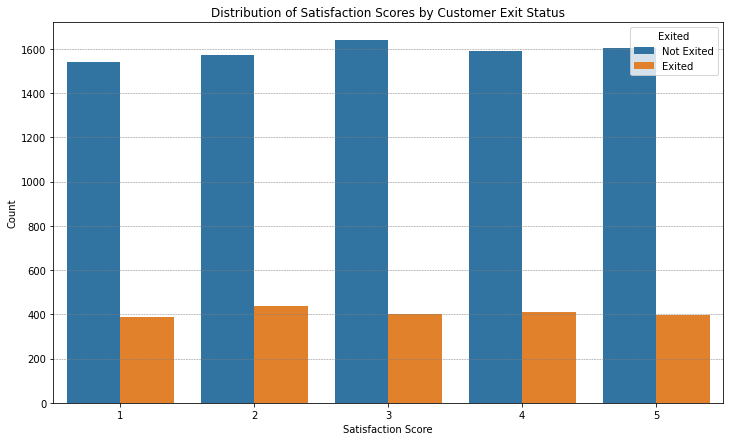

In [30]:
# Plot the distribution of satisfaction scores for exited and not exited customers
plt.figure(figsize=(12, 7))
sns.countplot(x='Satisfaction Score', hue='Exited', data=df)
plt.title('Distribution of Satisfaction Scores by Customer Exit Status')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Not Exited', 'Exited'])
plt.grid(axis='y',color='gray', linestyle='--', linewidth=0.5)
plt.show()
